# Coordinates to Pixels: Polygon in JSON

This notebook contains parts of code from Dr. Vadim Savenkov

In [1]:
import os, io, json
import pandas as pd
import geopandas as gpd
from ast import literal_eval
from shapely.geometry import shape, mapping as shapely_mapping
from shapely import wkt
import folium
import PIL
from __future__ import print_function
from ipywidgets import interact,interact_manual,HBox,Output,Tab
import time

import cv2
import statistics
from decimal import *
import random
import re
import sys
import multiprocessing.dummy as mp 
import numpy as np
import xml.etree.ElementTree as ET
from xml.dom import minidom

### Get unique IDs

In [2]:
# Get the first point of a polygon geometry string
def get_point_poly(geom):
    try:
        pt = re.split(r",", geom[9:])[0]
        pt = tuple(map(float, pt.split(' ')))
        pt_s = (pt[1], pt[0])
    except:
        print(sys.exc_info())
        return np.nan
    
    return pt_s

# Get all points of a polygon geometry string
def get_point_ls(geom):
    try:
        pt_ls = re.split(r",", geom[9:])
        for i in range(len(pt_ls)):
            temp = pt_ls[i].strip()
            temp = re.sub("[^\d. -]+", "", temp)
            temp = tuple(map(float, temp.split(' ')))
            pt_ls[i] = (temp[1], temp[0])
    except:
        print(sys.exc_info())
        return np.nan
    
    return pt_ls

### Load data

In [ ]:
# https://www.dropbox.com/sh/08ccnkpr5wdihdg/AAAz_s0IeX99co_34sARF70ma/OSM%20dataset%20JSON?dl=0&preview=osm_parking_polygons_09.json.gzip&subfolder_nav_tracking=1

In [3]:
# TRUCKS
# Load filtered list
df = pd.read_csv("ndata/osm_data_trucks.csv", index_col=0)

In [7]:
# CARS
# Load filtered list
#df = pd.read_csv("ndata/osm_data_cars.csv", index_col=0) # evtl. osm_data_cars_f!

In [4]:
# Working Test
get_point_poly(df.iloc[0,:].geometry)

(36.5400085, -89.5958862)

In [4]:
# Define pt tuple again and set geometry
df["pt"] = df["geometry"].transform(lambda x: get_point_poly(x))
df["pt_ls"] = df["geometry"].transform(lambda x: get_point_ls(x))
df['geometry'] = df['geometry'].apply(wkt.loads)

In [5]:
# Create Geo DataFrame
real_polys = gpd.GeoDataFrame(df, geometry="geometry")

In [6]:
# Set index column and sort index
real_polys.set_index("id_new", inplace=True)
real_polys.sort_index(inplace=True)

In [7]:
real_polys

,id,pt,geometry,all_tags,pt_ls
id_new,,,,,
-17.9495555_25.8216612_ts2,-17.95_25.822_ts2,"(-17.9495555, 25.8216612)","POLYGON ((25.82166 -17.94956, 25.82349 -17.950...","[{'key': 'amenity', 'value': 'parking'}, {'key...","[(-17.9495555, 25.8216612), (-17.9502199, 25.8..."
-20.6925135_139.4888175_ts1,-20.693_139.489_ts1,"(-20.6925135, 139.4888175)","POLYGON ((139.48882 -20.69251, 139.48911 -20.6...","[{'key': 'amenity', 'value': 'parking'}, {'key...","[(-20.6925135, 139.4888175), (-20.6926171, 139..."
-20.6925135_139.4888175_ts2,-20.693_139.489_ts2,"(-20.6925135, 139.4888175)","POLYGON ((139.48882 -20.69251, 139.48911 -20.6...","[{'key': 'amenity', 'value': 'parking'}, {'key...","[(-20.6925135, 139.4888175), (-20.6926171, 139..."
-23.5336629_148.1722669_ts2,-23.534_148.172_ts2,"(-23.5336629, 148.1722669)","POLYGON ((148.17227 -23.53366, 148.17327 -23.5...","[{'key': 'amenity', 'value': 'parking'}, {'key...","[(-23.5336629, 148.1722669), (-23.5337976, 148..."
-24.4068105_150.4983079_ts1,-24.407_150.498_ts1,"(-24.4068105, 150.4983079)","POLYGON ((150.49831 -24.40681, 150.49860 -24.4...","[{'key': 'amenity', 'value': 'parking'}, {'key...","[(-24.4068105, 150.4983079), (-24.4067243, 150..."
...,...,...,...,...,...
58.5918689_29.822495_ts2,58.592_29.822_ts2,"(58.5918689, 29.822495)","POLYGON ((29.82249 58.59187, 29.82274 58.59267...","[{'key': 'amenity', 'value': 'parking'}, {'key...","[(58.5918689, 29.822495), (58.5926656, 29.8227..."
59.1297703_11.2738828_ts1,59.13_11.274_ts1,"(59.1297703, 11.2738828)","POLYGON ((11.27388 59.12977, 11.27410 59.12965...","[{'key': 'amenity', 'value': 'parking'}, {'key...","[(59.1297703, 11.2738828), (59.1296506, 11.274..."
59.1297703_11.2738828_ts2,59.13_11.274_ts2,"(59.1297703, 11.2738828)","POLYGON ((11.27388 59.12977, 11.27410 59.12965...","[{'key': 'amenity', 'value': 'parking'}, {'key...","[(59.1297703, 11.2738828), (59.1296506, 11.274..."


### Create Maps

In [8]:
# Create an unique id based on position of parking lot
def parking_name(row):
    pt = row.pt
    ts = int(row.name[-1])
    
    return f"{round(pt[0],7)}_{round(pt[1],7)}_ts{ts}"

In [9]:
BOUNDS_RGB = (0xff,0x78, 0x00)
DATA_FNAME = "data/data.csv"
PATH = "data/img"
PATH_POLY = "data/img_polygons"
PATH_LABELS = "data/img_polygons"

def wnes2rect(w,n,e,s):
    """
    given West, North, East, South,
    return [southeast, northwest] for folium
    """
    return [[s,e],[n,w]]


def rgbcolor(r,g,b):
    """
    turn r, g, b integers into a CSS color code 
    """
    return f"#{r:02x}{g:02x}{b:02x}"

In [10]:
# Get the bounding box around an arbitrarily shaped geometry object
def geometry_bbox(geometry, init_bounds=None, x_offset=0., y_offset=0.):
    bounds = init_bounds or [[1000,-1000],[-1000,1000]]
    xs = [c[0] for c in geometry.exterior.coords]
    
    ys = [c[1] for c in geometry.exterior.coords]
    
    return [
        #southwest
        [min(bounds[0][0], min(ys)-y_offset), max(bounds[0][1], max(xs)+x_offset)],
        #northeast
        [max(bounds[1][0], max(ys)+y_offset), min(bounds[1][1], min(xs)-x_offset)]
    ]

In [15]:
def make_map(pt, ts, geometry=None, show_geometry=False, show_corners=False, pt_ls=None, show_bounds=False, size=640, seednr=100):
    """
    create folium map with a given center, 
    optionally fit and show a geometry and/or a larger bounding box
    """
    
    # Create satellite image map for the coordinate point specified
    m = folium.Map(location=pt, min_zoom=15, width=size, height=size, zoom_control=False, attribution_control=False)
    
    # First tile server
    if ts == 1:
        folium.TileLayer(
            tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
            attr = 'Esri', name = 'Esri Satellite', overlay = False, control = True
        ).add_to(m)
    
    # Second tile server
    elif ts == 2:
        folium.TileLayer(
            tiles = 'https://clarity.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
            attr = 'Esri', name = 'Esri Satellite', overlay = False, control = True
        ).add_to(m)

    
    # Default bounds
    bounds = [[pt[0], pt[1]],[pt[0], pt[1]]] #southwest, northeast

    # Lines of geometry and Box around them ("Bounds")
    if geometry:
        if show_geometry:
            folium.GeoJson(data=geometry).add_to(m)

        bounds = geometry_bbox(geometry, init_bounds=bounds, x_offset=0, y_offset=0)
    
    # Plot box around geometry
    if show_bounds:
        folium.Rectangle(bounds=bounds, color=rgbcolor(*BOUNDS_RGB), fill=True, fill_color=rgbcolor(*BOUNDS_RGB), fill_opacity=0).add_to(m) 
    
    # Plot Icon on corner points
    if show_corners and pt_ls is not None:
        # Take first point
        folium.Circle(location=pt_ls[0], radius=0.01, color="#FF00FF").add_to(m) # Pink
        # Take point in middle of list
        m_point = round(len(pt_ls)/2)
        folium.Circle(location=pt_ls[m_point], radius=0.01, color="#FFFF00").add_to(m) # Yellow
        
        # Testing purposes:
        #folium.Circle(location=pt_ls[2], radius=0.01, color="#00FFFF").add_to(m) # Türkis
        
        # Print all points of polygon
        #for i in pt_ls[1:]:
        #    folium.Circle(location=i, radius=0.01, color="#FF00FF").add_to(m)
            #icon=folium.Icon(icon="circle-dot", color='red', icon_color="blue", prefix='fa')
    
    
    # Create random offset
    kalibr = 8000
    random.seed(seednr)
    r_nr_x = random.randint(1,9)
    x_offset_l = r_nr_x/kalibr
    x_offset_r = (9-r_nr_x)/kalibr
    
    random.seed(seednr+20)
    r_nr_y = random.randint(1,9)
    y_offset_l = r_nr_y/kalibr
    y_offset_r = (9-r_nr_y)/kalibr
    
    crop_bounds = [[bounds[0][0]-y_offset_l, bounds[0][1]+x_offset_l],[bounds[1][0]+y_offset_r, bounds[1][1]-x_offset_r]] #southwest, northeast
    
    # Create red random crop box
    #if show_bounds:
        #folium.Rectangle(bounds=crop_bounds, color="red", fill=False, fill_color=rgbcolor(*BOUNDS_RGB), fill_opacity=0.).add_to(m) 
    
    m.fit_bounds(bounds, max_zoom = 18)
    #m.fit_bounds(crop_bounds) # FLAG
    
    return m, bounds

In [16]:
#row = real_polys.loc["37.1381102_-93.7235874_ts2",:]
row = real_polys.loc["51.0865082_13.2736163_ts2",:]
#row=real_polys.iloc[137]

seed = random.randint(1,9999)
#print(seed)
#print(row.pt)
#print(row.pt_ls)
print(row.name)

m, b = make_map(row.pt, ts=int(row.name[-1]), geometry=row.geometry, show_geometry=True, show_bounds=True, show_corners=False, pt_ls=row.pt_ls, size=640, seednr=seed) # create map with boundaries
m

51.0865082_13.2736163_ts2


In [173]:
if row.name[-1] == "2":
    idc = row.name[:-1]+"1"
else:
    idc = row.name[:-1]+"2"
row = real_polys.loc[idc,:]

m, b = make_map(row.pt, ts=int(row.name[-1]), geometry=row.geometry, show_geometry=True, show_bounds=False, show_corners=False, pt_ls=row.pt_ls, size=640, seednr=seed) # create map with boundaries
m

In [174]:
# 2693, 6466, 1871, 2954, 755

In [225]:
# LKW PARKPLATZ!
# real_polys.iloc[90]

id                                                         90
pt                                   (48.2145691, 14.2820994)
geometry    POLYGON ((14.2820994 48.2145691, 14.2823919 48...
all_tags    [{'key': 'access', 'value': 'permissive'}, {'k...
Name: 90, dtype: object

### Generate training data

In [14]:
# Get rounded mean of a list
def get_m(ls):
    return round(statistics.mean(ls))

In [15]:
# Create dictionary with image label data
def get_dict(filename, p_ls, parking_type, ppc_x, ppc_y):
    if parking_type == "TRUCK":
        class_id = "1"
    elif parking_type == "CAR":
        class_id = "2"
    else:
        raise ValueError("bad argument for parking type")
    
    x, y = [],[]
    
    for i in p_ls:
        x.append(i[0])
        y.append(i[1])
    
    dict1 = {f"{filename}-{parking_type}":
             {"filename": f"{filename}.jpeg",
              "ppc_x": str(ppc_x),
              "ppc_y": str(ppc_y),
              "regions": 
              {"0": {"shape_attributes":
                {"name":"polygon",
                 "all_points_x": x,
                 "all_points_y": y},
                "region_attributes":
                {"parking_lot": class_id}
               }
              }
             }
            }
    
    return dict1

In [16]:
# Get Pixels per "Coordinate" (per longitude or latitude)
def get_ppc(p_0, p_1, coord_0, coord_1):
    getcontext().prec = 28
    
    dx_c = Decimal(coord_1[1]) - Decimal(coord_0[1]) # A! Coord: (Y,X)
    dy_c = Decimal(coord_1[0]) - Decimal(coord_0[0]) # A! Coord: (Y,X)

    dx_p = p_1[0] - p_0[0] # Px: (X,Y)
    dy_p = p_1[1] - p_0[1]

    ppc_x = Decimal(dx_p) / Decimal(dx_c)
    ppc_y = Decimal(dy_p) / Decimal(dy_c)

    return ppc_x, ppc_y

# Get pixel position of another coordinate based on ppc and one base point
def get_point(ppc_x, ppc_y, p_0, coord_0, coord_2):
    getcontext().prec = 28
    dx_c = Decimal(coord_2[1]) - Decimal(coord_0[1]) # A! Coord: (Y,X)
    dy_c = Decimal(coord_2[0]) - Decimal(coord_0[0]) # A! Coord: (Y,X)

    dx_p = Decimal(ppc_x) * Decimal(dx_c)
    dy_p = Decimal(ppc_y) * Decimal(dy_c)

    px_2 = round(p_0[0] + dx_p)
    py_2 = round(p_0[1] + dy_p)

    return (px_2, py_2)

In [17]:
# Save maps and labels
def save_map(row, path=None, path_labels=None, force=False, size=640):
    """
    convert map into one file without any labels,
    create a json file with polygon pixel positions
    """
    
#    if force==False and os.path.isfile(f"{path}/{name}.jpeg") and \
#        os.path.isfile(f"{path_labels}/{name}.xml"):
#        return "Error: files already created"
#
#    os.makedirs(path, exist_ok=True)
#    os.makedirs(path_labels, exist_ok=True)
    
    
    # Get id of parking lot
    name = parking_name(row)
    
    # Get image with borders
    seed = random.randint(1,9999)
    m, bounds = make_map(row.pt, ts=int(row.name[-1]), geometry=row.geometry, show_bounds=False, show_corners=True, pt_ls=row.pt_ls, size=size, seednr=seed) # create map with boundaries
    time.sleep(0.5)

    img_data = m._to_png()
    img = Image.open(io.BytesIO(img_data))
    #img.save(f"{path_labels}/{name}.png") # Save image with bounding box and random offset bounding box
    
    img_size = (0,0,size,size)
    img = img.crop(img_size)
    
    # Heuristic to get pixel position of all polygon points (but originally ordered)
    rgbimg = img.convert('RGB')
    img_np = np.array(rgbimg)
    
    Yv, Xv = np.where(np.all(img_np==[255,0,255], axis=2)) #Pt 1, pink
    #print("X violett", list(Xv))
    #print("Y violett", list(Yv))
    
    Yg, Xg = np.where(np.all(img_np==[255,255,0], axis=2)) # Pt middle of pt_list, yellow
    #print("X gelb", list(Xg))
    #print("Y gelb", list(Yg))
    
    tuple_v = (get_m(Xv), get_m(Yv))
    tuple_g = (get_m(Xg), get_m(Yg))
    
    m_point = round(len(row.pt_ls)/2)
    x_ppc_x, x_ppc_y = get_ppc(tuple_v, tuple_g, row.pt_ls[0], row.pt_ls[m_point]) # Get pixel number per latitute/longitude
    
    p_list = [tuple_v]
    
    for i in row.pt_ls[1:]:
        if i == m_point:
            p_list.append(tuple_g)
        else: 
            point_pred = get_point(x_ppc_x, x_ppc_y, tuple_v, row.pt_ls[0], i)
            p_list.append(point_pred)
    
    # Testing purposes: 
    #print("First Base point: ", row.pt_ls[0], tuple_v)
    #print("Second Base point:", row.pt_ls[m_point], tuple_g)
    # Check if pixels of third point are correct
    #Yt, Xt = np.where(np.all(img_np==[0,255,255], axis=2))
    #print("Third point pred: ", row.pt_ls[2], (get_m(Xt), get_m(Yt)))
    #print(p_list)
    
    # Draw Polygon for testing
    #draw = ImageDraw.Draw(img)
    #draw.polygon(p_list, outline=(255, 0, 255))
    
    # Create and save dict - CHANGE PARKING TYPE: TRUCK=1, CAR=2
    dict1 = get_dict(name, p_list, "CAR", x_ppc_x, x_ppc_y)       ####################################

    with open(f'{path}/{name}.json', 'w') as f:
        json.dump(dict1, f, indent=4)
    
    # get image without any labels for training
    m, _ = make_map(row.pt, ts=int(row.name[-1]), geometry=row.geometry, size=size, seednr=seed)
    time.sleep(2) # To make sure the whole satellite imagery has been loaded
    
    img_data = m._to_png()
    img = Image.open(io.BytesIO(img_data))
    img = img.crop(img_size)
    
    # Save image in path
    rgb_im = img.convert("RGB")
    rgb_im.save(f"{path}/{name}.jpeg")

    return img

In [19]:
row = real_polys.loc[i,:]
#row = real_polys.iloc[21,:]

save_map(row, path="ndata/TEST", path_labels="ndata/TEST", force=True, size=640)

### Save images

In [20]:
# The perfect truck parking lot
real_polys.loc["51.0865082_13.2736163_ts2"]

id                                          51.087_13.274_ts2
pt                                   (51.0865082, 13.2736163)
geometry    POLYGON ((13.2736163 51.0865082, 13.2740137 51...
all_tags    [{'key': 'amenity', 'value': 'parking'}, {'key...
pt_ls       [(51.0865082, 13.2736163), (51.0864989, 13.274...
Name: 51.0865082_13.2736163_ts2, dtype: object

In [20]:
# Specify saving path here!
SAVING_PATH = "unet-data/trucks"

In [21]:
# Shuffle data frame to get random test-train split
real_polys_shuffled = real_polys.sample(frac = 1, random_state=101)

In [20]:
# TRUCK: Drop images manually (no map data anymore)
#real_polys_shuffled = real_polys_shuffled.drop("53.1673107_43.9693816_ts1")
# Test Car: 49.0827665_19.6537468_ts2
# T rain Car: 44.6471399_-79.3507606_ts2, 54.9414633_43.3272951_ts2

In [25]:
# Function to save an image according to id
def save_map_executer(idx):
    PATH = PATH_LABELS = SAVING_PATH   
    
    try:
        row = real_polys_shuffled.loc[idx]
        save_map(row, path=PATH, path_labels=PATH_LABELS, force=False, size=512) # CHECK IMAGE SIZE
        print(f"Completed image: {idx}")
    except:
        print(f"Error while processing image {idx}:", sys.exc_info())

In [23]:
# Train-Test Numbers
test_share = 0.15
print("Length:", len(real_polys))
test_nr = round(len(real_polys)*test_share)
print("Test:   ", test_nr)
print("Train: ", len(real_polys)-test_nr)

Length: 1076
Test:    161
Train:  915


In [24]:
PATH = PATH_LABELS = SAVING_PATH

# Start with image counting nr:
id_from = 0

# End with image counting nr:
id_to = len(real_polys) #len(real_polys)

print(f"Generate {id_to-id_from} images with real_polys label data:")
interact_generate = interact_manual.options(manual_name="Generate Data")
@interact_generate(ix_from=(0,len(real_polys),1), ix_to=(0,len(real_polys), 1))

def create_data(ix_from=id_from, ix_to=id_to, path=PATH, path_labels=PATH_LABELS): #len(real_polys)
    start_time = time.localtime() # Save timestamps to show starting time and runtime
    start_t = time.time()
    print("Started at:", time.asctime(start_time))
    
    p = mp.Pool() # without argument uses: os.cpu_count(), i.e. max number of threads
    p.map(save_map_executer, real_polys_shuffled.iloc[ix_from:ix_to,:].index)
    p.close()
    p.join()

    end_t = time.time()
    print("Computation time (Min.):", (end_t-start_t)/60)
    return "Data creation completed"

Generate 1076 images with real_polys label data:


interactive(children=(IntSlider(value=0, description='ix_from', max=1076), IntSlider(value=1076, description='…

In [ ]:
# First run test_trucks (160 Images): 3,17 Sec/image (Besser Images/sec?)
# Second run train_trucks (900 Images): 46,8948 Min
# Now, in order to ensure correct results, with 1 Sec additional time lag (160 Images): 3,13

### Merge all jsons to one json

In [11]:
SAVING_PATH = r"ndata/data_trucks/test"

In [12]:
# Get all json filenames
filenames = os.listdir(SAVING_PATH)
filenames_n = filenames.copy()

for i in filenames:
    if i.endswith("jpeg") or i.startswith("."):
        filenames_n.remove(i)

# Load and merge all json files
first = True

for i in filenames_n:
    with open(f"{SAVING_PATH}/{i}", "r") as f:
        data = json.load(f)
    
    if first:
        temp = data
        first = False
    else:
        temp = {**temp, **data}

# Save merged jsons in SAVING_PATH
with open(f'{SAVING_PATH}/via_region_data.json', 'w') as f:
    json.dump(temp, f, indent=4)

### Test if label in json is correct

In [22]:
TEST_PATH = r"ndata/TEST"

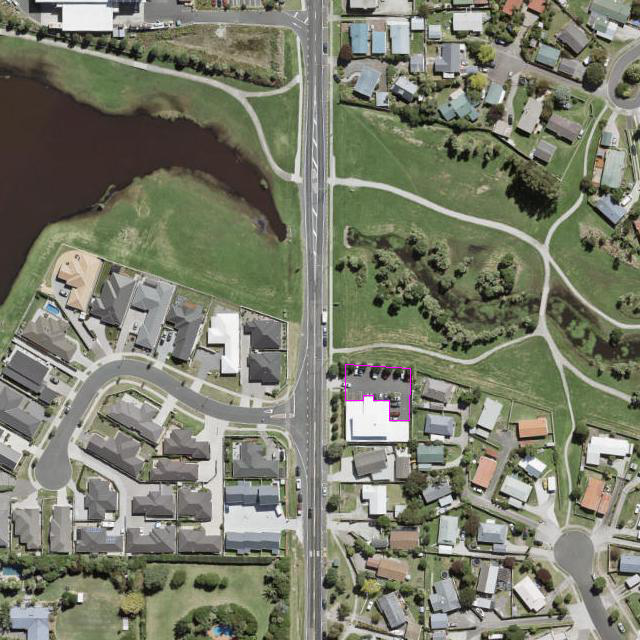

In [23]:
# Checking labels
rnr = random.randrange(1, len(real_polys))
#print(rnr)

#idx = real_polys.iloc[rnr].name
idx = "-37.7039888_176.2849439_ts2"

path_jpeg = f"{TEST_PATH}/{idx}.jpeg"
path_json = f"{TEST_PATH}/{idx}.json"

with open(path_json, "r") as f:
    data = json.load(f)

l = len(data[f"{idx}-TRUCK"]["regions"]["0"]["shape_attributes"]["all_points_x"])
pol_tu = []

for i in range(l):
    x = data[f"{idx}-TRUCK"]["regions"]["0"]["shape_attributes"]["all_points_x"][i]
    y = data[f"{idx}-TRUCK"]["regions"]["0"]["shape_attributes"]["all_points_y"][i]
    tuple1 = (x, y)
    pol_tu.append(tuple1)

#print(pol_tu)


img = Image.open(path_jpeg)
draw = ImageDraw.Draw(img)
draw.polygon(pol_tu, outline=(255, 0, 255))
img

### Testing if predicted point list is correct

In [9]:
SAVING_PATH = r"ndata/TEST-Polygon-pixels"

979


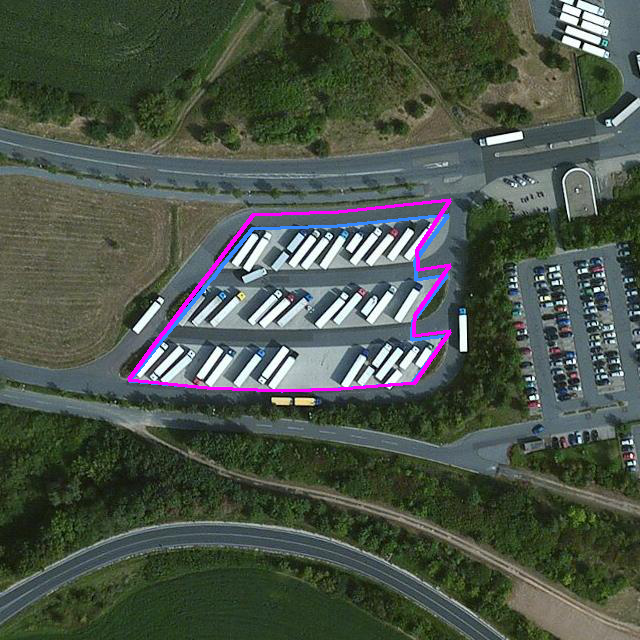

In [37]:
# Checking labels
rnr = random.randrange(1, len(real_polys))
print(rnr)

#idx = real_polys.iloc[rnr].name
idx = "51.0865082_13.2736163_ts2"
path_jpeg = f"{SAVING_PATH}/{idx}.jpeg" #r"C:\Users\Felix\Documents\Code\Trustbit\ndata\train_cars-DELETE\27.4397807_-82.5933404_ts2.jpeg"
    
# OLD, biased!
pol_tu = [(207, 387), (282, 390), (340, 388), (415, 382), (450, 331), (414, 336), (414, 327), (415, 315), (450, 265), (418, 270), (418, 263), (417, 250), (450, 200), (338, 212), (252, 215), (220, 257), (212, 268), (204, 278), (172, 320), (167, 327), (157, 339), (128, 379), (207, 387)]

# NEW, unbiased
pol_tu2 = [(207, 387), (281, 390), (338, 388), (413, 382), (447, 336), (412, 340), (412, 331), (413, 321), (447, 275), (416, 280), (416, 273), (415, 261), (448, 215), (337, 226), (251, 229), (219, 268), (212, 278), (204, 287), (173, 325), (167, 332), (158, 343), (129, 380), (207, 387)]

#pol_tu = pol_tu2.copy()
#random.shuffle(pol_tu2)

img = Image.open(path_jpeg)
draw = ImageDraw.Draw(img)
draw.line(pol_tu2, fill=(53, 136, 253), width=4) # true label
draw.line(pol_tu, fill=(255, 0, 255), width=4) # estimated label
#draw.polygon(pol_tu, outline=(255, 0, 255))
#draw.polygon(pol_tu2, outline=(53, 136, 253))
img

### Get Masks

In [15]:
DATA_PATH = r"ndata/test_trucks-Backup"

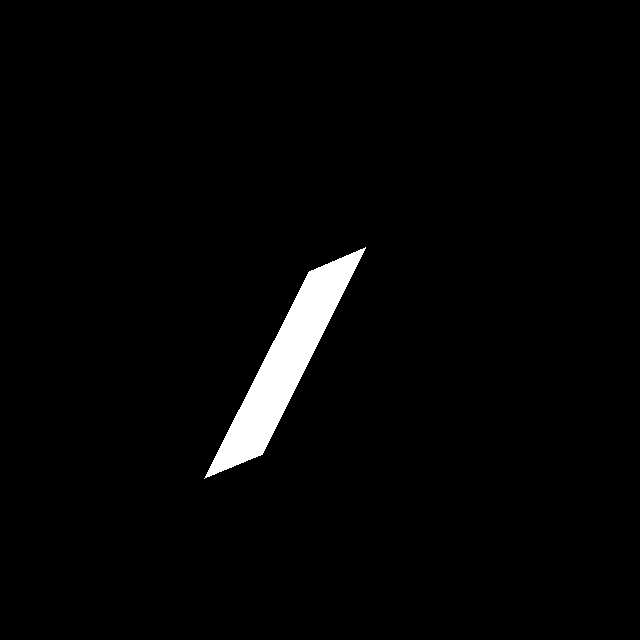

In [29]:
# Checking labels
#rnr = random.randrange(1, len(real_polys))
#print(rnr)

#idx = real_polys.iloc[rnr].name
idx = "-36.222571_146.4457342_ts1"

path_jpeg = f"{DATA_PATH}/{idx}.jpeg"
path_json = f"{DATA_PATH}/{idx}.json"

with open(path_json, "r") as f:
    data = json.load(f)

l = len(data[f"{idx}-TRUCK"]["regions"]["0"]["shape_attributes"]["all_points_x"])
pol_tu = []

for i in range(l):
    x = data[f"{idx}-TRUCK"]["regions"]["0"]["shape_attributes"]["all_points_x"][i]
    y = data[f"{idx}-TRUCK"]["regions"]["0"]["shape_attributes"]["all_points_y"][i]
    tuple1 = (x, y)
    pol_tu.append(tuple1)

#print(pol_tu)


#img = Image.open(path_jpeg)
img = Image.new(mode = "RGB", size = (640, 640))
draw = ImageDraw.Draw(img)
draw.polygon(pol_tu, fill=(255, 255, 255))
img